# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [ ]:
!pip install pymongo

In [ ]:
!pip install pymongo[srv]

In [ ]:
!pip install dnspython

In [ ]:
!pip install tweepy

In [ ]:
!pip install twitter

## Import Python libraries

In [4]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [5]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [6]:
client = MongoClient(mongod_connect)
db = client.demo # use or create a database named demo
tweet_collection = db.lab9 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [7]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [8]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [9]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

AttributeError: module 'tweepy' has no attribute 'StreamListener'

## Use the REST API to Collect Tweets

Authorize the REST API 

In [10]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [11]:
count = 1000 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [12]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Fri Nov 11 05:33:28 +0000 2022'
'Fri Nov 11 05:33:28 +0000 2022'
'Fri Nov 11 05:33:28 +0000 2022'
'Fri Nov 11 05:33:28 +0000 2022'
'Fri Nov 11 05:33:28 +0000 2022'
'Fri Nov 11 05:33:28 +0000 2022'
'Fri Nov 11 05:33:28 +0000 2022'
'Fri Nov 11 05:33:28 +0000 2022'
'Fri Nov 11 05:33:28 +0000 2022'
'Fri Nov 11 05:33:27 +0000 2022'
'Fri Nov 11 05:33:27 +0000 2022'
'Fri Nov 11 05:33:27 +0000 2022'
'Fri Nov 11 05:33:27 +0000 2022'
'Fri Nov 11 05:33:27 +0000 2022'
'Fri Nov 11 05:33:26 +0000 2022'
'Fri Nov 11 05:33:26 +0000 2022'
'Fri Nov 11 05:33:26 +0000 2022'
'Fri Nov 11 05:33:26 +0000 2022'
'Fri Nov 11 05:33:26 +0000 2022'
'Fri Nov 11 05:33:26 +0000 2022'
'Fri Nov 11 05:33:25 +0000 2022'
'Fri Nov 11 05:33:25 +0000 2022'
'Fri Nov 11 05:33:25 +0000 2022'
'Fri Nov 11 05:33:25 +0000 2022'
'Fri Nov 11 05:33:25 +0000 2022'
'Fri Nov 11 05:33:25 +0000 2022'
'Fri Nov 11 05:33:25 +0000 2022'
'Fri Nov 11 05:33:25 +0000 2022'
'Fri Nov 11 05:33:25 +0000 2022'
'Fri Nov 11 05:33:24 +0000 2022'
'Fri Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [13]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Fri Nov 11 05:33:18 +0000 2022'
'Fri Nov 11 05:33:18 +0000 2022'
'Fri Nov 11 05:33:18 +0000 2022'
'Fri Nov 11 05:33:18 +0000 2022'
'Fri Nov 11 05:33:18 +0000 2022'
'Fri Nov 11 05:33:18 +0000 2022'
'Fri Nov 11 05:33:17 +0000 2022'
'Fri Nov 11 05:33:17 +0000 2022'
'Fri Nov 11 05:33:17 +0000 2022'
'Fri Nov 11 05:33:17 +0000 2022'
'Fri Nov 11 05:33:17 +0000 2022'
'Fri Nov 11 05:33:17 +0000 2022'
'Fri Nov 11 05:33:17 +0000 2022'
'Fri Nov 11 05:33:17 +0000 2022'
'Fri Nov 11 05:33:17 +0000 2022'
'Fri Nov 11 05:33:17 +0000 2022'
'Fri Nov 11 05:33:17 +0000 2022'
'Fri Nov 11 05:33:16 +0000 2022'
'Fri Nov 11 05:33:16 +0000 2022'
'Fri Nov 11 05:33:16 +0000 2022'
'Fri Nov 11 05:33:16 +0000 2022'
'Fri Nov 11 05:33:16 +0000 2022'
'Fri Nov 11 05:33:16 +0000 2022'
'Fri Nov 11 05:33:16 +0000 2022'
'Fri Nov 11 05:33:16 +0000 2022'
'Fri Nov 11 05:33:15 +0000 2022'
'Fri Nov 11 05:33:15 +0000 2022'
'Fri Nov 11 05:33:15 +0000 2022'
'Fri Nov 11 05:33:15 +0000 2022'
'Fri Nov 11 05:33:15 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:32:46 +0000 2022'
'Fri Nov 11 05:32:46 +0000 2022'
'Fri Nov 11 05:32:45 +0000 2022'
'Fri Nov 11 05:32:45 +0000 2022'
'Fri Nov 11 05:32:45 +0000 2022'
'Fri Nov 11 05:32:45 +0000 2022'
'Fri Nov 11 05:32:45 +0000 2022'
'Fri Nov 11 05:32:45 +0000 2022'
'Fri Nov 11 05:32:44 +0000 2022'
'Fri Nov 11 05:32:44 +0000 2022'
'Fri Nov 11 05:32:44 +0000 2022'
'Fri Nov 11 05:32:44 +0000 2022'
'Fri Nov 11 05:32:44 +0000 2022'
'Fri Nov 11 05:32:44 +0000 2022'
'Fri Nov 11 05:32:44 +0000 2022'
'Fri Nov 11 05:32:43 +0000 2022'
'Fri Nov 11 05:32:43 +0000 2022'
'Fri Nov 11 05:32:43 +0000 2022'
'Fri Nov 11 05:32:43 +0000 2022'
'Fri Nov 11 05:32:43 +0000 2022'
'Fri Nov 11 05:32:43 +0000 2022'
'Fri Nov 11 05:32:43 +0000 2022'
'Fri Nov 11 05:32:42 +0000 2022'
'Fri Nov 11 05:32:42 +0000 2022'
'Fri Nov 11 05:32:42 +0000 2022'
'Fri Nov 11 05:32:42 +0000 2022'
'Fri Nov 11 05:32:42 +0000 2022'
'Fri Nov 11 05:32:42 +0000 2022'
'Fri Nov 11 05:32:41 +0000 2022'
'Fri Nov 11 05:32:41 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:32:11 +0000 2022'
'Fri Nov 11 05:32:10 +0000 2022'
'Fri Nov 11 05:32:10 +0000 2022'
'Fri Nov 11 05:32:10 +0000 2022'
'Fri Nov 11 05:32:10 +0000 2022'
'Fri Nov 11 05:32:10 +0000 2022'
'Fri Nov 11 05:32:10 +0000 2022'
'Fri Nov 11 05:32:09 +0000 2022'
'Fri Nov 11 05:32:09 +0000 2022'
'Fri Nov 11 05:32:09 +0000 2022'
'Fri Nov 11 05:32:09 +0000 2022'
'Fri Nov 11 05:32:09 +0000 2022'
'Fri Nov 11 05:32:08 +0000 2022'
'Fri Nov 11 05:32:08 +0000 2022'
'Fri Nov 11 05:32:08 +0000 2022'
'Fri Nov 11 05:32:08 +0000 2022'
'Fri Nov 11 05:32:08 +0000 2022'
'Fri Nov 11 05:32:08 +0000 2022'
'Fri Nov 11 05:32:07 +0000 2022'
'Fri Nov 11 05:32:07 +0000 2022'
'Fri Nov 11 05:32:07 +0000 2022'
'Fri Nov 11 05:32:06 +0000 2022'
'Fri Nov 11 05:32:06 +0000 2022'
'Fri Nov 11 05:32:06 +0000 2022'
'Fri Nov 11 05:32:05 +0000 2022'
'Fri Nov 11 05:32:05 +0000 2022'
'Fri Nov 11 05:32:05 +0000 2022'
'Fri Nov 11 05:32:05 +0000 2022'
'Fri Nov 11 05:32:05 +0000 2022'
'Fri Nov 11 05:32:05 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:31:36 +0000 2022'
'Fri Nov 11 05:31:36 +0000 2022'
'Fri Nov 11 05:31:36 +0000 2022'
'Fri Nov 11 05:31:36 +0000 2022'
'Fri Nov 11 05:31:35 +0000 2022'
'Fri Nov 11 05:31:35 +0000 2022'
'Fri Nov 11 05:31:35 +0000 2022'
'Fri Nov 11 05:31:35 +0000 2022'
'Fri Nov 11 05:31:35 +0000 2022'
'Fri Nov 11 05:31:35 +0000 2022'
'Fri Nov 11 05:31:35 +0000 2022'
'Fri Nov 11 05:31:35 +0000 2022'
'Fri Nov 11 05:31:35 +0000 2022'
'Fri Nov 11 05:31:34 +0000 2022'
'Fri Nov 11 05:31:34 +0000 2022'
'Fri Nov 11 05:31:34 +0000 2022'
'Fri Nov 11 05:31:34 +0000 2022'
'Fri Nov 11 05:31:34 +0000 2022'
'Fri Nov 11 05:31:34 +0000 2022'
'Fri Nov 11 05:31:34 +0000 2022'
'Fri Nov 11 05:31:34 +0000 2022'
'Fri Nov 11 05:31:34 +0000 2022'
'Fri Nov 11 05:31:34 +0000 2022'
'Fri Nov 11 05:31:34 +0000 2022'
'Fri Nov 11 05:31:33 +0000 2022'
'Fri Nov 11 05:31:33 +0000 2022'
'Fri Nov 11 05:31:33 +0000 2022'
'Fri Nov 11 05:31:33 +0000 2022'
'Fri Nov 11 05:31:33 +0000 2022'
'Fri Nov 11 05:31:33 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:31:04 +0000 2022'
'Fri Nov 11 05:31:04 +0000 2022'
'Fri Nov 11 05:31:04 +0000 2022'
'Fri Nov 11 05:31:03 +0000 2022'
'Fri Nov 11 05:31:03 +0000 2022'
'Fri Nov 11 05:31:03 +0000 2022'
'Fri Nov 11 05:31:03 +0000 2022'
'Fri Nov 11 05:31:03 +0000 2022'
'Fri Nov 11 05:31:02 +0000 2022'
'Fri Nov 11 05:31:02 +0000 2022'
'Fri Nov 11 05:31:02 +0000 2022'
'Fri Nov 11 05:31:02 +0000 2022'
'Fri Nov 11 05:31:02 +0000 2022'
'Fri Nov 11 05:31:02 +0000 2022'
'Fri Nov 11 05:31:02 +0000 2022'
'Fri Nov 11 05:31:01 +0000 2022'
'Fri Nov 11 05:31:01 +0000 2022'
'Fri Nov 11 05:31:01 +0000 2022'
'Fri Nov 11 05:31:01 +0000 2022'
'Fri Nov 11 05:31:00 +0000 2022'
'Fri Nov 11 05:31:00 +0000 2022'
'Fri Nov 11 05:31:00 +0000 2022'
'Fri Nov 11 05:31:00 +0000 2022'
'Fri Nov 11 05:31:00 +0000 2022'
'Fri Nov 11 05:31:00 +0000 2022'
'Fri Nov 11 05:31:00 +0000 2022'
'Fri Nov 11 05:31:00 +0000 2022'
'Fri Nov 11 05:31:00 +0000 2022'
'Fri Nov 11 05:31:00 +0000 2022'
'Fri Nov 11 05:30:59 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:30:25 +0000 2022'
'Fri Nov 11 05:30:25 +0000 2022'
'Fri Nov 11 05:30:25 +0000 2022'
'Fri Nov 11 05:30:25 +0000 2022'
'Fri Nov 11 05:30:25 +0000 2022'
'Fri Nov 11 05:30:25 +0000 2022'
'Fri Nov 11 05:30:24 +0000 2022'
'Fri Nov 11 05:30:24 +0000 2022'
'Fri Nov 11 05:30:24 +0000 2022'
'Fri Nov 11 05:30:23 +0000 2022'
'Fri Nov 11 05:30:23 +0000 2022'
'Fri Nov 11 05:30:23 +0000 2022'
'Fri Nov 11 05:30:23 +0000 2022'
'Fri Nov 11 05:30:22 +0000 2022'
'Fri Nov 11 05:30:22 +0000 2022'
'Fri Nov 11 05:30:22 +0000 2022'
'Fri Nov 11 05:30:22 +0000 2022'
'Fri Nov 11 05:30:22 +0000 2022'
'Fri Nov 11 05:30:22 +0000 2022'
'Fri Nov 11 05:30:22 +0000 2022'
'Fri Nov 11 05:30:22 +0000 2022'
'Fri Nov 11 05:30:22 +0000 2022'
'Fri Nov 11 05:30:21 +0000 2022'
'Fri Nov 11 05:30:21 +0000 2022'
'Fri Nov 11 05:30:21 +0000 2022'
'Fri Nov 11 05:30:21 +0000 2022'
'Fri Nov 11 05:30:21 +0000 2022'
'Fri Nov 11 05:30:21 +0000 2022'
'Fri Nov 11 05:30:21 +0000 2022'
'Fri Nov 11 05:30:21 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:29:50 +0000 2022'
'Fri Nov 11 05:29:50 +0000 2022'
'Fri Nov 11 05:29:50 +0000 2022'
'Fri Nov 11 05:29:50 +0000 2022'
'Fri Nov 11 05:29:50 +0000 2022'
'Fri Nov 11 05:29:50 +0000 2022'
'Fri Nov 11 05:29:50 +0000 2022'
'Fri Nov 11 05:29:49 +0000 2022'
'Fri Nov 11 05:29:49 +0000 2022'
'Fri Nov 11 05:29:49 +0000 2022'
'Fri Nov 11 05:29:49 +0000 2022'
'Fri Nov 11 05:29:49 +0000 2022'
'Fri Nov 11 05:29:49 +0000 2022'
'Fri Nov 11 05:29:48 +0000 2022'
'Fri Nov 11 05:29:48 +0000 2022'
'Fri Nov 11 05:29:48 +0000 2022'
'Fri Nov 11 05:29:48 +0000 2022'
'Fri Nov 11 05:29:48 +0000 2022'
'Fri Nov 11 05:29:48 +0000 2022'
'Fri Nov 11 05:29:48 +0000 2022'
'Fri Nov 11 05:29:48 +0000 2022'
'Fri Nov 11 05:29:48 +0000 2022'
'Fri Nov 11 05:29:47 +0000 2022'
'Fri Nov 11 05:29:47 +0000 2022'
'Fri Nov 11 05:29:47 +0000 2022'
'Fri Nov 11 05:29:47 +0000 2022'
'Fri Nov 11 05:29:47 +0000 2022'
'Fri Nov 11 05:29:47 +0000 2022'
'Fri Nov 11 05:29:47 +0000 2022'
'Fri Nov 11 05:29:47 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:29:16 +0000 2022'
'Fri Nov 11 05:29:16 +0000 2022'
'Fri Nov 11 05:29:16 +0000 2022'
'Fri Nov 11 05:29:16 +0000 2022'
'Fri Nov 11 05:29:16 +0000 2022'
'Fri Nov 11 05:29:16 +0000 2022'
'Fri Nov 11 05:29:15 +0000 2022'
'Fri Nov 11 05:29:15 +0000 2022'
'Fri Nov 11 05:29:15 +0000 2022'
'Fri Nov 11 05:29:15 +0000 2022'
'Fri Nov 11 05:29:15 +0000 2022'
'Fri Nov 11 05:29:15 +0000 2022'
'Fri Nov 11 05:29:15 +0000 2022'
'Fri Nov 11 05:29:15 +0000 2022'
'Fri Nov 11 05:29:14 +0000 2022'
'Fri Nov 11 05:29:14 +0000 2022'
'Fri Nov 11 05:29:14 +0000 2022'
'Fri Nov 11 05:29:14 +0000 2022'
'Fri Nov 11 05:29:14 +0000 2022'
'Fri Nov 11 05:29:14 +0000 2022'
'Fri Nov 11 05:29:14 +0000 2022'
'Fri Nov 11 05:29:14 +0000 2022'
'Fri Nov 11 05:29:14 +0000 2022'
'Fri Nov 11 05:29:13 +0000 2022'
'Fri Nov 11 05:29:13 +0000 2022'
'Fri Nov 11 05:29:13 +0000 2022'
'Fri Nov 11 05:29:13 +0000 2022'
'Fri Nov 11 05:29:13 +0000 2022'
'Fri Nov 11 05:29:13 +0000 2022'
'Fri Nov 11 05:29:12 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:28:35 +0000 2022'
'Fri Nov 11 05:28:35 +0000 2022'
'Fri Nov 11 05:28:35 +0000 2022'
'Fri Nov 11 05:28:35 +0000 2022'
'Fri Nov 11 05:28:35 +0000 2022'
'Fri Nov 11 05:28:35 +0000 2022'
'Fri Nov 11 05:28:35 +0000 2022'
'Fri Nov 11 05:28:34 +0000 2022'
'Fri Nov 11 05:28:34 +0000 2022'
'Fri Nov 11 05:28:34 +0000 2022'
'Fri Nov 11 05:28:34 +0000 2022'
'Fri Nov 11 05:28:34 +0000 2022'
'Fri Nov 11 05:28:34 +0000 2022'
'Fri Nov 11 05:28:34 +0000 2022'
'Fri Nov 11 05:28:34 +0000 2022'
'Fri Nov 11 05:28:34 +0000 2022'
'Fri Nov 11 05:28:34 +0000 2022'
'Fri Nov 11 05:28:34 +0000 2022'
'Fri Nov 11 05:28:34 +0000 2022'
'Fri Nov 11 05:28:33 +0000 2022'
'Fri Nov 11 05:28:33 +0000 2022'
'Fri Nov 11 05:28:33 +0000 2022'
'Fri Nov 11 05:28:33 +0000 2022'
'Fri Nov 11 05:28:33 +0000 2022'
'Fri Nov 11 05:28:32 +0000 2022'
'Fri Nov 11 05:28:32 +0000 2022'
'Fri Nov 11 05:28:31 +0000 2022'
'Fri Nov 11 05:28:31 +0000 2022'
'Fri Nov 11 05:28:31 +0000 2022'
'Fri Nov 11 05:28:31 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:28:03 +0000 2022'
'Fri Nov 11 05:28:02 +0000 2022'
'Fri Nov 11 05:28:02 +0000 2022'
'Fri Nov 11 05:28:02 +0000 2022'
'Fri Nov 11 05:28:02 +0000 2022'
'Fri Nov 11 05:28:02 +0000 2022'
'Fri Nov 11 05:28:02 +0000 2022'
'Fri Nov 11 05:28:01 +0000 2022'
'Fri Nov 11 05:28:01 +0000 2022'
'Fri Nov 11 05:28:01 +0000 2022'
'Fri Nov 11 05:28:01 +0000 2022'
'Fri Nov 11 05:28:01 +0000 2022'
'Fri Nov 11 05:28:01 +0000 2022'
'Fri Nov 11 05:28:01 +0000 2022'
'Fri Nov 11 05:27:54 +0000 2022'
'Fri Nov 11 05:15:24 +0000 2022'
'Fri Nov 11 05:15:24 +0000 2022'
'Fri Nov 11 05:15:24 +0000 2022'
'Fri Nov 11 05:15:24 +0000 2022'
'Fri Nov 11 05:15:24 +0000 2022'
'Fri Nov 11 05:15:24 +0000 2022'
'Fri Nov 11 05:15:24 +0000 2022'
'Fri Nov 11 05:15:24 +0000 2022'
'Fri Nov 11 05:15:24 +0000 2022'
'Fri Nov 11 05:15:24 +0000 2022'
'Fri Nov 11 05:15:24 +0000 2022'
'Fri Nov 11 05:15:23 +0000 2022'
'Fri Nov 11 05:15:23 +0000 2022'
'Fri Nov 11 05:15:23 +0000 2022'
'Fri Nov 11 05:15:23 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:14:54 +0000 2022'
'Fri Nov 11 05:14:54 +0000 2022'
'Fri Nov 11 05:14:54 +0000 2022'
'Fri Nov 11 05:14:54 +0000 2022'
'Fri Nov 11 05:14:54 +0000 2022'
'Fri Nov 11 05:14:54 +0000 2022'
'Fri Nov 11 05:14:54 +0000 2022'
'Fri Nov 11 05:14:54 +0000 2022'
'Fri Nov 11 05:14:54 +0000 2022'
'Fri Nov 11 05:14:54 +0000 2022'
'Fri Nov 11 05:14:54 +0000 2022'
'Fri Nov 11 05:14:54 +0000 2022'
'Fri Nov 11 05:14:53 +0000 2022'
'Fri Nov 11 05:14:53 +0000 2022'
'Fri Nov 11 05:14:53 +0000 2022'
'Fri Nov 11 05:14:53 +0000 2022'
'Fri Nov 11 05:14:53 +0000 2022'
'Fri Nov 11 05:14:52 +0000 2022'
'Fri Nov 11 05:14:52 +0000 2022'
'Fri Nov 11 05:14:52 +0000 2022'
'Fri Nov 11 05:14:52 +0000 2022'
'Fri Nov 11 05:14:52 +0000 2022'
'Fri Nov 11 05:14:51 +0000 2022'
'Fri Nov 11 05:14:51 +0000 2022'
'Fri Nov 11 05:14:51 +0000 2022'
'Fri Nov 11 05:14:51 +0000 2022'
'Fri Nov 11 05:14:51 +0000 2022'
'Fri Nov 11 05:14:51 +0000 2022'
'Fri Nov 11 05:14:51 +0000 2022'
'Fri Nov 11 05:14:51 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:14:21 +0000 2022'
'Fri Nov 11 05:14:21 +0000 2022'
'Fri Nov 11 05:14:21 +0000 2022'
'Fri Nov 11 05:14:21 +0000 2022'
'Fri Nov 11 05:14:21 +0000 2022'
'Fri Nov 11 05:14:21 +0000 2022'
'Fri Nov 11 05:14:21 +0000 2022'
'Fri Nov 11 05:14:20 +0000 2022'
'Fri Nov 11 05:14:20 +0000 2022'
'Fri Nov 11 05:14:20 +0000 2022'
'Fri Nov 11 05:14:20 +0000 2022'
'Fri Nov 11 05:14:20 +0000 2022'
'Fri Nov 11 05:14:19 +0000 2022'
'Fri Nov 11 05:14:19 +0000 2022'
'Fri Nov 11 05:14:19 +0000 2022'
'Fri Nov 11 05:14:18 +0000 2022'
'Fri Nov 11 05:14:18 +0000 2022'
'Fri Nov 11 05:14:18 +0000 2022'
'Fri Nov 11 05:14:18 +0000 2022'
'Fri Nov 11 05:14:18 +0000 2022'
'Fri Nov 11 05:14:18 +0000 2022'
'Fri Nov 11 05:14:17 +0000 2022'
'Fri Nov 11 05:14:17 +0000 2022'
'Fri Nov 11 05:14:17 +0000 2022'
'Fri Nov 11 05:14:17 +0000 2022'
'Fri Nov 11 05:14:17 +0000 2022'
'Fri Nov 11 05:14:17 +0000 2022'
'Fri Nov 11 05:14:17 +0000 2022'
'Fri Nov 11 05:14:17 +0000 2022'
'Fri Nov 11 05:14:17 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:13:49 +0000 2022'
'Fri Nov 11 05:13:49 +0000 2022'
'Fri Nov 11 05:13:49 +0000 2022'
'Fri Nov 11 05:13:49 +0000 2022'
'Fri Nov 11 05:13:49 +0000 2022'
'Fri Nov 11 05:13:49 +0000 2022'
'Fri Nov 11 05:13:48 +0000 2022'
'Fri Nov 11 05:13:48 +0000 2022'
'Fri Nov 11 05:13:48 +0000 2022'
'Fri Nov 11 05:13:48 +0000 2022'
'Fri Nov 11 05:13:48 +0000 2022'
'Fri Nov 11 05:13:48 +0000 2022'
'Fri Nov 11 05:13:48 +0000 2022'
'Fri Nov 11 05:13:48 +0000 2022'
'Fri Nov 11 05:13:47 +0000 2022'
'Fri Nov 11 05:13:47 +0000 2022'
'Fri Nov 11 05:13:47 +0000 2022'
'Fri Nov 11 05:13:47 +0000 2022'
'Fri Nov 11 05:13:47 +0000 2022'
'Fri Nov 11 05:13:47 +0000 2022'
'Fri Nov 11 05:13:47 +0000 2022'
'Fri Nov 11 05:13:47 +0000 2022'
'Fri Nov 11 05:13:46 +0000 2022'
'Fri Nov 11 05:13:46 +0000 2022'
'Fri Nov 11 05:13:46 +0000 2022'
'Fri Nov 11 05:13:46 +0000 2022'
'Fri Nov 11 05:13:46 +0000 2022'
'Fri Nov 11 05:13:46 +0000 2022'
'Fri Nov 11 05:13:45 +0000 2022'
'Fri Nov 11 05:13:45 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:13:16 +0000 2022'
'Fri Nov 11 05:13:16 +0000 2022'
'Fri Nov 11 05:13:15 +0000 2022'
'Fri Nov 11 05:13:15 +0000 2022'
'Fri Nov 11 05:13:15 +0000 2022'
'Fri Nov 11 05:13:15 +0000 2022'
'Fri Nov 11 05:13:15 +0000 2022'
'Fri Nov 11 05:13:15 +0000 2022'
'Fri Nov 11 05:13:15 +0000 2022'
'Fri Nov 11 05:13:15 +0000 2022'
'Fri Nov 11 05:13:14 +0000 2022'
'Fri Nov 11 05:13:14 +0000 2022'
'Fri Nov 11 05:13:14 +0000 2022'
'Fri Nov 11 05:13:14 +0000 2022'
'Fri Nov 11 05:13:14 +0000 2022'
'Fri Nov 11 05:13:13 +0000 2022'
'Fri Nov 11 05:13:13 +0000 2022'
'Fri Nov 11 05:13:13 +0000 2022'
'Fri Nov 11 05:13:13 +0000 2022'
'Fri Nov 11 05:13:13 +0000 2022'
'Fri Nov 11 05:13:12 +0000 2022'
'Fri Nov 11 05:13:12 +0000 2022'
'Fri Nov 11 05:13:12 +0000 2022'
'Fri Nov 11 05:13:12 +0000 2022'
'Fri Nov 11 05:13:12 +0000 2022'
'Fri Nov 11 05:13:12 +0000 2022'
'Fri Nov 11 05:13:12 +0000 2022'
'Fri Nov 11 05:13:12 +0000 2022'
'Fri Nov 11 05:13:12 +0000 2022'
'Fri Nov 11 05:13:12 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:12:42 +0000 2022'
'Fri Nov 11 05:12:41 +0000 2022'
'Fri Nov 11 05:12:41 +0000 2022'
'Fri Nov 11 05:12:41 +0000 2022'
'Fri Nov 11 05:12:40 +0000 2022'
'Fri Nov 11 05:12:40 +0000 2022'
'Fri Nov 11 05:12:40 +0000 2022'
'Fri Nov 11 05:12:40 +0000 2022'
'Fri Nov 11 05:12:40 +0000 2022'
'Fri Nov 11 05:12:40 +0000 2022'
'Fri Nov 11 05:12:40 +0000 2022'
'Fri Nov 11 05:12:40 +0000 2022'
'Fri Nov 11 05:12:40 +0000 2022'
'Fri Nov 11 05:12:39 +0000 2022'
'Fri Nov 11 05:12:39 +0000 2022'
'Fri Nov 11 05:12:39 +0000 2022'
'Fri Nov 11 05:12:39 +0000 2022'
'Fri Nov 11 05:12:39 +0000 2022'
'Fri Nov 11 05:12:39 +0000 2022'
'Fri Nov 11 05:12:39 +0000 2022'
'Fri Nov 11 05:12:39 +0000 2022'
'Fri Nov 11 05:12:39 +0000 2022'
'Fri Nov 11 05:12:39 +0000 2022'
'Fri Nov 11 05:12:38 +0000 2022'
'Fri Nov 11 05:12:38 +0000 2022'
'Fri Nov 11 05:12:38 +0000 2022'
'Fri Nov 11 05:12:38 +0000 2022'
'Fri Nov 11 05:12:38 +0000 2022'
'Fri Nov 11 05:12:38 +0000 2022'
'Fri Nov 11 05:12:37 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:12:08 +0000 2022'
'Fri Nov 11 05:12:08 +0000 2022'
'Fri Nov 11 05:12:08 +0000 2022'
'Fri Nov 11 05:12:07 +0000 2022'
'Fri Nov 11 05:12:07 +0000 2022'
'Fri Nov 11 05:12:07 +0000 2022'
'Fri Nov 11 05:12:07 +0000 2022'
'Fri Nov 11 05:12:07 +0000 2022'
'Fri Nov 11 05:12:07 +0000 2022'
'Fri Nov 11 05:12:07 +0000 2022'
'Fri Nov 11 05:12:07 +0000 2022'
'Fri Nov 11 05:12:07 +0000 2022'
'Fri Nov 11 05:12:07 +0000 2022'
'Fri Nov 11 05:12:07 +0000 2022'
'Fri Nov 11 05:12:07 +0000 2022'
'Fri Nov 11 05:12:06 +0000 2022'
'Fri Nov 11 05:12:06 +0000 2022'
'Fri Nov 11 05:12:06 +0000 2022'
'Fri Nov 11 05:12:06 +0000 2022'
'Fri Nov 11 05:12:06 +0000 2022'
'Fri Nov 11 05:12:06 +0000 2022'
'Fri Nov 11 05:12:06 +0000 2022'
'Fri Nov 11 05:12:06 +0000 2022'
'Fri Nov 11 05:12:06 +0000 2022'
'Fri Nov 11 05:12:06 +0000 2022'
'Fri Nov 11 05:12:06 +0000 2022'
'Fri Nov 11 05:12:05 +0000 2022'
'Fri Nov 11 05:12:05 +0000 2022'
'Fri Nov 11 05:12:05 +0000 2022'
'Fri Nov 11 05:12:05 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:11:38 +0000 2022'
'Fri Nov 11 05:11:38 +0000 2022'
'Fri Nov 11 05:11:38 +0000 2022'
'Fri Nov 11 05:11:38 +0000 2022'
'Fri Nov 11 05:11:38 +0000 2022'
'Fri Nov 11 05:11:38 +0000 2022'
'Fri Nov 11 05:11:37 +0000 2022'
'Fri Nov 11 05:11:37 +0000 2022'
'Fri Nov 11 05:11:37 +0000 2022'
'Fri Nov 11 05:11:37 +0000 2022'
'Fri Nov 11 05:11:37 +0000 2022'
'Fri Nov 11 05:11:37 +0000 2022'
'Fri Nov 11 05:11:37 +0000 2022'
'Fri Nov 11 05:11:36 +0000 2022'
'Fri Nov 11 05:11:36 +0000 2022'
'Fri Nov 11 05:11:36 +0000 2022'
'Fri Nov 11 05:11:36 +0000 2022'
'Fri Nov 11 05:11:36 +0000 2022'
'Fri Nov 11 05:11:36 +0000 2022'
'Fri Nov 11 05:11:36 +0000 2022'
'Fri Nov 11 05:11:36 +0000 2022'
'Fri Nov 11 05:11:36 +0000 2022'
'Fri Nov 11 05:11:36 +0000 2022'
'Fri Nov 11 05:11:36 +0000 2022'
'Fri Nov 11 05:11:35 +0000 2022'
'Fri Nov 11 05:11:35 +0000 2022'
'Fri Nov 11 05:11:35 +0000 2022'
'Fri Nov 11 05:11:35 +0000 2022'
'Fri Nov 11 05:11:35 +0000 2022'
'Fri Nov 11 05:11:35 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:11:06 +0000 2022'
'Fri Nov 11 05:11:06 +0000 2022'
'Fri Nov 11 05:11:06 +0000 2022'
'Fri Nov 11 05:11:06 +0000 2022'
'Fri Nov 11 05:11:05 +0000 2022'
'Fri Nov 11 05:11:05 +0000 2022'
'Fri Nov 11 05:11:05 +0000 2022'
'Fri Nov 11 05:11:05 +0000 2022'
'Fri Nov 11 05:11:05 +0000 2022'
'Fri Nov 11 05:11:05 +0000 2022'
'Fri Nov 11 05:11:05 +0000 2022'
'Fri Nov 11 05:11:05 +0000 2022'
'Fri Nov 11 05:11:04 +0000 2022'
'Fri Nov 11 05:11:04 +0000 2022'
'Fri Nov 11 05:11:04 +0000 2022'
'Fri Nov 11 05:11:04 +0000 2022'
'Fri Nov 11 05:11:04 +0000 2022'
'Fri Nov 11 05:11:04 +0000 2022'
'Fri Nov 11 05:11:04 +0000 2022'
'Fri Nov 11 05:11:04 +0000 2022'
'Fri Nov 11 05:11:04 +0000 2022'
'Fri Nov 11 05:11:03 +0000 2022'
'Fri Nov 11 05:11:03 +0000 2022'
'Fri Nov 11 05:11:03 +0000 2022'
'Fri Nov 11 05:11:02 +0000 2022'
'Fri Nov 11 05:11:02 +0000 2022'
'Fri Nov 11 05:11:02 +0000 2022'
'Fri Nov 11 05:11:02 +0000 2022'
'Fri Nov 11 05:11:02 +0000 2022'
'Fri Nov 11 05:11:02 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:10:36 +0000 2022'
'Fri Nov 11 05:10:36 +0000 2022'
'Fri Nov 11 05:10:36 +0000 2022'
'Fri Nov 11 05:10:36 +0000 2022'
'Fri Nov 11 05:10:36 +0000 2022'
'Fri Nov 11 05:10:36 +0000 2022'
'Fri Nov 11 05:10:36 +0000 2022'
'Fri Nov 11 05:10:36 +0000 2022'
'Fri Nov 11 05:10:36 +0000 2022'
'Fri Nov 11 05:10:36 +0000 2022'
'Fri Nov 11 05:10:36 +0000 2022'
'Fri Nov 11 05:10:36 +0000 2022'
'Fri Nov 11 05:10:36 +0000 2022'
'Fri Nov 11 05:10:35 +0000 2022'
'Fri Nov 11 05:10:35 +0000 2022'
'Fri Nov 11 05:10:35 +0000 2022'
'Fri Nov 11 05:10:35 +0000 2022'
'Fri Nov 11 05:10:35 +0000 2022'
'Fri Nov 11 05:10:34 +0000 2022'
'Fri Nov 11 05:10:34 +0000 2022'
'Fri Nov 11 05:10:34 +0000 2022'
'Fri Nov 11 05:10:34 +0000 2022'
'Fri Nov 11 05:10:34 +0000 2022'
'Fri Nov 11 05:10:34 +0000 2022'
'Fri Nov 11 05:10:34 +0000 2022'
'Fri Nov 11 05:10:34 +0000 2022'
'Fri Nov 11 05:10:34 +0000 2022'
'Fri Nov 11 05:10:34 +0000 2022'
'Fri Nov 11 05:10:34 +0000 2022'
'Fri Nov 11 05:10:34 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:10:08 +0000 2022'
'Fri Nov 11 05:10:08 +0000 2022'
'Fri Nov 11 05:10:08 +0000 2022'
'Fri Nov 11 05:10:07 +0000 2022'
'Fri Nov 11 05:10:07 +0000 2022'
'Fri Nov 11 05:10:07 +0000 2022'
'Fri Nov 11 05:10:07 +0000 2022'
'Fri Nov 11 05:10:07 +0000 2022'
'Fri Nov 11 05:10:07 +0000 2022'
'Fri Nov 11 05:10:07 +0000 2022'
'Fri Nov 11 05:10:06 +0000 2022'
'Fri Nov 11 05:10:06 +0000 2022'
'Fri Nov 11 05:10:06 +0000 2022'
'Fri Nov 11 05:10:06 +0000 2022'
'Fri Nov 11 05:10:06 +0000 2022'
'Fri Nov 11 05:10:06 +0000 2022'
'Fri Nov 11 05:10:06 +0000 2022'
'Fri Nov 11 05:10:06 +0000 2022'
'Fri Nov 11 05:10:05 +0000 2022'
'Fri Nov 11 05:10:05 +0000 2022'
'Fri Nov 11 05:10:05 +0000 2022'
'Fri Nov 11 05:10:05 +0000 2022'
'Fri Nov 11 05:10:05 +0000 2022'
'Fri Nov 11 05:10:05 +0000 2022'
'Fri Nov 11 05:10:05 +0000 2022'
'Fri Nov 11 05:10:05 +0000 2022'
'Fri Nov 11 05:10:05 +0000 2022'
'Fri Nov 11 05:10:04 +0000 2022'
'Fri Nov 11 05:10:04 +0000 2022'
'Fri Nov 11 05:10:04 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:09:37 +0000 2022'
'Fri Nov 11 05:09:37 +0000 2022'
'Fri Nov 11 05:09:37 +0000 2022'
'Fri Nov 11 05:09:37 +0000 2022'
'Fri Nov 11 05:09:36 +0000 2022'
'Fri Nov 11 05:09:36 +0000 2022'
'Fri Nov 11 05:09:36 +0000 2022'
'Fri Nov 11 05:09:36 +0000 2022'
'Fri Nov 11 05:09:36 +0000 2022'
'Fri Nov 11 05:09:36 +0000 2022'
'Fri Nov 11 05:09:36 +0000 2022'
'Fri Nov 11 05:09:35 +0000 2022'
'Fri Nov 11 05:09:35 +0000 2022'
'Fri Nov 11 05:09:35 +0000 2022'
'Fri Nov 11 05:09:35 +0000 2022'
'Fri Nov 11 05:09:35 +0000 2022'
'Fri Nov 11 05:09:34 +0000 2022'
'Fri Nov 11 05:09:34 +0000 2022'
'Fri Nov 11 05:09:34 +0000 2022'
'Fri Nov 11 05:09:34 +0000 2022'
'Fri Nov 11 05:09:34 +0000 2022'
'Fri Nov 11 05:09:34 +0000 2022'
'Fri Nov 11 05:09:34 +0000 2022'
'Fri Nov 11 05:09:33 +0000 2022'
'Fri Nov 11 05:09:33 +0000 2022'
'Fri Nov 11 05:09:33 +0000 2022'
'Fri Nov 11 05:09:33 +0000 2022'
'Fri Nov 11 05:09:33 +0000 2022'
'Fri Nov 11 05:09:33 +0000 2022'
'Fri Nov 11 05:09:33 +0000 2022'
'Fri Nov 1

'Fri Nov 11 05:09:06 +0000 2022'
'Fri Nov 11 05:09:06 +0000 2022'
'Fri Nov 11 05:09:06 +0000 2022'
'Fri Nov 11 05:09:06 +0000 2022'
'Fri Nov 11 05:09:06 +0000 2022'
'Fri Nov 11 05:09:06 +0000 2022'
'Fri Nov 11 05:09:06 +0000 2022'
'Fri Nov 11 05:09:06 +0000 2022'
'Fri Nov 11 05:09:06 +0000 2022'
'Fri Nov 11 05:09:05 +0000 2022'
'Fri Nov 11 05:09:05 +0000 2022'
'Fri Nov 11 05:09:05 +0000 2022'
'Fri Nov 11 05:09:05 +0000 2022'
'Fri Nov 11 05:09:05 +0000 2022'
'Fri Nov 11 05:09:05 +0000 2022'
'Fri Nov 11 05:09:05 +0000 2022'
'Fri Nov 11 05:09:05 +0000 2022'
'Fri Nov 11 05:09:05 +0000 2022'
'Fri Nov 11 05:09:04 +0000 2022'
'Fri Nov 11 05:09:04 +0000 2022'
'Fri Nov 11 05:09:04 +0000 2022'
'Fri Nov 11 05:09:04 +0000 2022'
'Fri Nov 11 05:09:04 +0000 2022'
'Fri Nov 11 05:09:04 +0000 2022'
'Fri Nov 11 05:09:03 +0000 2022'
'Fri Nov 11 05:09:03 +0000 2022'
'Fri Nov 11 05:09:03 +0000 2022'
'Fri Nov 11 05:09:03 +0000 2022'
'Fri Nov 11 05:09:03 +0000 2022'
'Fri Nov 11 05:09:03 +0000 2022'
'Fri Nov 1

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=1000&max_id=1590934595423588358&oauth_consumer_key=i4g6pTDMtGTTTk232Ft5NH1Ed&oauth_nonce=18317313760881874182&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1668145050&oauth_token=60388598-mylObKICmdarCkLD84rx8vtJqzz08te0LBNb1VFsl&oauth_version=1.0&q=election&oauth_signature=IdjqjXmiCyyDcdYgPvsSJom2tuc%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [14]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

11130
8161


Create a text index and print the Tweets containing specific keywords. 

In [15]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [16]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [17]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Laurie🌻
text: RT @lighthouse_lily: @marceelias This is why we VOTE. 
If you did not vote in this election you are making it harder to vote in the next el…
----
name: LibertyIsTheWay
text: RT @Michael_Voris: Early voting. Mailbox voting. Absentee voting. All should be disallowed. THIS is the strategy by the Commies to install…
----
name: JonA✝️
text: RT @Michael_Voris: Early voting. Mailbox voting. Absentee voting. All should be disallowed. THIS is the strategy by the Commies to install…
----
name: NOT_EXONERATED_1
text: @EricMMatheny MAIL-IN VOTING 

IS NOT IN-PERSON VOTING.

THE VOTES ARE MAILED THROUGH ELECTION DAY.

U.S. MAIL!

MA… https://t.co/v6TTDEjC5w
----
name: Natan Fernando Pereira Martins
text: RT @DrPaulGosar: Total voters 2022:
5.6 million votes New York
8.7 million votes Florida 
1.9 million votes Arizona 

NY and FLA complete r…
----
name: Peace...
text: RT @DrPaulGosar: Total voters 2022:
5.6 million votes New York
8.7 million votes Florida 
1.9 million votes

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [19]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,possibly_sensitive,extended_entities,quoted_status,withheld_in_countries
0,636dde296628c92ff8dc0489,Fri Nov 11 05:15:54 +0000 2022,1590936330741387265,1590936330741387265,RT @lighthouse_lily: @marceelias This is why w...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,636ddec73c53eb27c8f1863e,Fri Nov 11 05:32:23 +0000 2022,1590940480627691520,1590940480627691520,RT @Michael_Voris: Early voting. Mailbox votin...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,636dddd76628c92ff8dbf431,Fri Nov 11 05:24:59 +0000 2022,1590938617073270785,1590938617073270785,RT @Michael_Voris: Early voting. Mailbox votin...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,636ddf7d3c53eb27c8f1aa5e,Fri Nov 11 05:11:55 +0000 2022,1590935329850417152,1590935329850417152,@EricMMatheny MAIL-IN VOTING \n\nIS NOT IN-PER...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.590702e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,636ddf963c53eb27c8f1af2c,Fri Nov 11 05:09:30 +0000 2022,1590934721567260673,1590934721567260673,RT @DrPaulGosar: Total voters 2022:\n5.6 milli...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
5,636ddedf3c53eb27c8f18aeb,Fri Nov 11 05:29:37 +0000 2022,1590939783731515393,1590939783731515393,RT @DrPaulGosar: Total voters 2022:\n5.6 milli...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
6,636ddedd3c53eb27c8f18a7f,Fri Nov 11 05:29:52 +0000 2022,1590939846117187584,1590939846117187584,RT @DrPaulGosar: Total voters 2022:\n5.6 milli...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
7,636dddf66628c92ff8dbfa43,Fri Nov 11 05:21:34 +0000 2022,1590937759773970433,1590937759773970433,RT @DrPaulGosar: Total voters 2022:\n5.6 milli...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
8,636dddec6628c92ff8dbf854,Fri Nov 11 05:22:39 +0000 2022,1590938029903949824,1590938029903949824,RT @DrPaulGosar: Total voters 2022:\n5.6 milli...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
9,636ddf783c53eb27c8f1a934,Fri Nov 11 05:12:32 +0000 2022,1590935483319980033,1590935483319980033,RT @JohnOberg: No matter how you feel about th...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

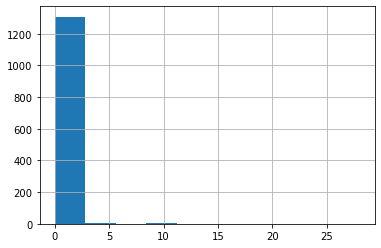

In [21]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count